In [1]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad, trapezoid, simpson, nquad
from sympy import symbols, diff, integrate, lambdify

# Parcial II - Métodos Computacionales (Integrales y Matrices)
**2024-2**

---

*Nombre:* Juan José Usuga Giraldo

*Identificación:* 1020482080

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub (en su carpeta) y recuerde hacer pull-request

# 1

**(20 puntos)**
Considera la siguiente integral:

$$
I = \int_0^1 \int_{x^2}^{x+1} \int_{y^2}^{y+2} \int_{z^2}^{z+3} (x+y+z+w) \, dw \, dz \, dy \, dx
$$

Encuentre la solución númerica usando unicamente `quad`. Encuentre el error relativo, para esto emplee el siguiente código que usa `nquad`:


```python
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")
```



In [2]:
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")

Resultado de la integral: -0.6500971589021813
Error estimado: 1.8391891749223705e-12


In [3]:
# Aqui va su código
f = lambda w, z, y, x: x + y + z + w
x, y, z, w = symbols('x y z w')
integral = integrate(integrate(integrate(integrate(f(w, z, y, x), (w, z**2, z+3)), (z, y**2, y+2)), (y, x**2, x+1)), (x, 0, 1))
print(integral)




-3480768983/5354228880


In [4]:
error = abs(result - integral) / abs(integral)
print(f"Error relativo: {error}")

Error relativo: 2.39089221232714E-15


In [5]:
def integrand2(w, z, y, x):
       return x + y + z + w

In [6]:
def w_limi(z, y, x):
       return [z**2, z + 3]

def z_limi(y, x):
       return [y**2, y + 2]

def y_limi(x):
       return [x**2, x + 1]

def x_limi():
       return [0, 1]

In [7]:
def integral_quad():
       pri_integral = lambda z, y, x: quad(integrand2, w_limi(z, y, x)[0], w_limi(z, y, x)[1], args=(z, y, x))[0]
       seg_integral = lambda y, x: quad(pri_integral, z_limi(y, x)[0], z_limi(y, x)[1], args=(y, x))[0]
       ter_integral = lambda x: quad(seg_integral, y_limi(x)[0], y_limi(x)[1], args=(x))[0]
       result = quad(ter_integral, x_limi()[0], x_limi()[1])[0]
       return result

In [8]:
result_quad = integral_quad()
print(f"usando quad ome, da  {result_quad}")

usando quad ome, da  -0.6500971589021813


In [9]:
integrand_nquad = lambda w, z, y, x: x + y + z + w
w_limi_nquad = lambda z, y, x: [z**2, z+3]
z_limi_nquad = lambda y, x: [y**2, y+2]
y_limi_nquad = lambda x: [x**2, x+1]
x_limi_nquad = lambda: [0, 1]
result_nquad, error_nquad = nquad(
integrand_nquad,
[w_limi_nquad, z_limi_nquad, y_limi_nquad, x_limi_nquad])
errorr = abs(result_quad - result_nquad) / abs(result_nquad)
print(f"error relativo: {errorr}")

error relativo: 0.0


# 2

**(40 puntos)**
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo.


Para
* $a$ = 1,
* $I$ = 3,
* $μ0/4π$ = 1


Usando funciones explicitas explique claramente las entradas, salidas y procedimientos dentro de las mismas. Recuerde para resolver las integrales usar `quad` y grafique para:

*a)* $A_φ(r = 1.1, θ)$ vs. $0\leq θ\leq \pi$

*b)* $A_φ(r, θ = π∕3)$ vs. $0\leq r \leq 10$

Tenga cuidado con la convergencia de su integral



In [10]:
# Las constantes
a = 1  # radio del lazo
I = 3  # corriente del lazo
mu0_4pi = 1  # μ0 / 4π


In [11]:
#definimos la funcion k(k) la cual es una integral que va de cero a 2 pi
def K(k):
  integrand = lambda fi: 1 / np.sqrt(1 - k**2 * np.sin(fi)**2)
  result, _ = quad(integrand, 0, np.pi/2)
  return result

In [12]:
def E(k):
  integrand = lambda fi: np.sqrt(1 - k**2 * np.sin(fi)**2)
  result, _ = quad(integrand, 0, np.pi/2)
  return result

In [13]:
def A_fi(r, teta):
  k_squared = (4 * a * r * np.sin(teta)) / (a**2 + r**2 + 2 * a * r * np.sin(teta))
  k = np.sqrt(k_squared)

In [14]:
# LA funcion para  A fi (r, θ)
def A_fi(r, teta):
  k_squared = (4 * a * r * np.sin(teta)) / (a**2 + r**2 + 2 * a * r * np.sin(teta))
  k = np.sqrt(k_squared)
  if abs(k - 1) < 1e-10:
    k = 1 - 1e-10

  result = mu0_4pi * (4 * I * a) / np.sqrt(a**2 + r**2 + 2 * a * r * np.sin(teta))
  result *= ((2 - k**2) * K(k) - 2 * E(k)) / k**2
  return result

<ipython-input-14-eab5ba72e9f2>:9: RuntimeWarning: invalid value encountered in scalar divide
  result *= ((2 - k**2) * K(k) - 2 * E(k)) / k**2


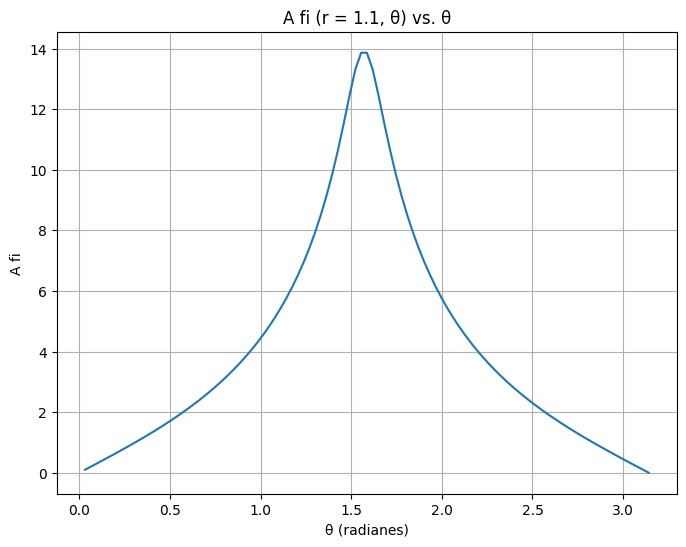

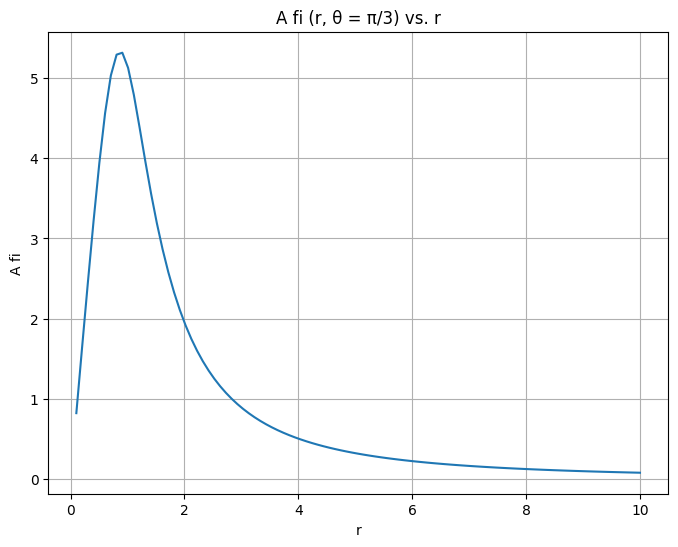

In [15]:
teta_val = np.linspace(0, np.pi, 100)
A_fi_val_a = [A_fi(1.1, teta) for teta in teta_val]

plt.figure(figsize=(8, 6))
plt.plot(teta_val, A_fi_val_a)
plt.title("A fi (r = 1.1, θ) vs. θ")
plt.xlabel("θ (radianes)")
plt.ylabel("A fi")
plt.grid(True)
plt.show()

# (b) Plot Aφ(r, θ = π/3) vs. r
r_val = np.linspace(0, 10, 100)
A_fi_val_b = [A_fi(r, np.pi/3) for r in r_val]

plt.figure(figsize=(8, 6))
plt.plot(r_val, A_fi_val_b)
plt.title("A fi (r, θ = π/3) vs. r")
plt.xlabel("r")
plt.ylabel("A fi")
plt.grid(True)
plt.show()

# 3

(**40 puntos**) El **método de la potencia inversa** es una técnica iterativa utilizada para calcular el autovalor de menor magnitud de una matriz cuadrada. Es una variante del **método de la potencia**, que normalmente encuentra el autovalor de mayor magnitud. Para ello, se aprovecha la propiedad de la matriz inversa:

$$ A^{-1} v = \frac{1}{\lambda} v $$


## Algoritmo

El método de la potencia inversa sigue los siguientes pasos:

1. Elegir un vector inicial $x^{(0)}$ no nulo.

2. Para cada iteración $k$, resolver el sistema lineal:
   
   $$ A y^{(k)} = x^{(k-1)} $$
   
   donde $y^{(k)}$ es un **vector intermedio** que se obtiene resolviendo el sistema lineal. Este vector representa la solución del sistema en cada iteración y es crucial para aproximar el autovector de menor autovalor.

3. Normalizar $y^{(k)}$ para obtener un nuevo vector de iteración:
   
   $$ x^{(k)} = \frac{y^{(k)}}{\| y^{(k)} \|} $$
   
4. Aproximar el autovalor mediante el cociente de Rayleigh:
   
   $$ \lambda^{(k)} = \frac{(x^{(k)})^T A x^{(k)}}{(x^{(k)})^T x^{(k)}} $$
   
5. Repetir los pasos anteriores hasta que la diferencia entre valores sucesivos de $\lambda$ sea menor que un umbral de tolerancia.

---

*a)* Escriba una función llamada `potencia_inversa` que dada una matriz A encuentre su valor propio menos dominante (con una tolerancia de 1e-7 usando la norma Euclidiana) y su correspondiente autovector. Para obtener $y^{(k)}$ puede emplear `np.linalg.solve` recordando que $Ay = x$.

*b)* Usando la matriz A, encuentre el $\lambda_{min}$ y el correspondiente autovector. Examine la convergencia de su autovalor en función de las iteraciones, esto es, haga un gráfico de $\lambda(k)$

$$
\begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}
$$

*c)* Compare su resultado con `np.linalg.eig`

In [16]:
#Vamos primero a usar shape para la matriz A, luego el vector inicial aleatorio va a depender del n que sale de shape
def potencia_inversa(A, tol=1e-7):
    n = A.shape[0]
    x = np.random.rand(n)
    lambda_prev = 0

    while True:
        y = np.linalg.solve(A, x)
        x = y / np.linalg.norm(y)
        lambda_ome = x.T @ A @ x


        if abs(lambda_ome - lambda_prev) < tol:
            break

        lambda_prev = lambda_ome

    return lambda_ome, x



Autovalor menos dominante: 1.0000000009682988
Autovector correspondiente: [-0.44720115  0.89443341]


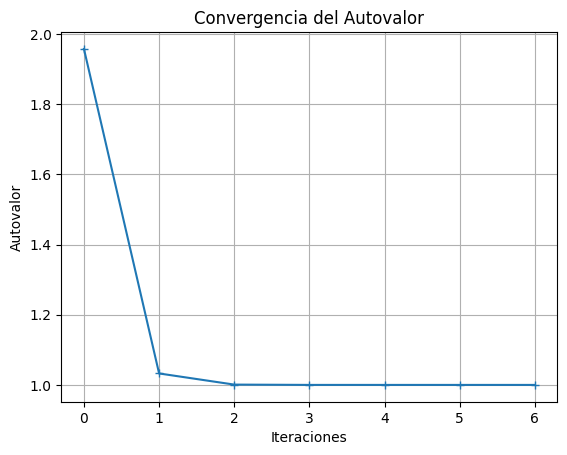

In [20]:
A = np.array([[5, 2], [2, 2]])
lambda_min, autovector = potencia_inversa(A)

print("Autovalor menos dominante:", lambda_min)
print("Autovector correspondiente:", autovector)

# Profe ahora miramos la convergencia del autovalor
lambda_val = []
x = np.random.rand(A.shape[0])
lambda_prev = 0

for _ in range(10):  # Realizar 10 iteraciones
    y = np.linalg.solve(A, x)
    x = y / np.linalg.norm(y)
    lambda_ome = x.T @ A @ x
    lambda_val.append(lambda_ome)

    if abs(lambda_ome - lambda_prev) < 1e-7:
        break

    lambda_prev = lambda_ome

plt.plot(lambda_val, marker='+')
plt.title("Convergencia del Autovalor")
plt.xlabel("Iteraciones")
plt.ylabel("Autovalor")
plt.grid(True)
plt.show()


In [18]:
# (c) Comparar con np.linalg.eig
autovalores, autovectores = np.linalg.eig(A)
lambda_min_eig = min(autovalores)
index_min = np.argmin(autovalores)
autovector_eig = autovectores[:, index_min]

print("Autovalor menos dominante (np.linalg.eig):", lambda_min_eig)
print("Autovector correspondiente (np.linalg.eig):", autovector_eig)
print("Autovalor menos dominante:", lambda_min)
print("Autovector correspondiente:", autovector)

Autovalor menos dominante (np.linalg.eig): 1.0
Autovector correspondiente (np.linalg.eig): [-0.4472136   0.89442719]
Autovalor menos dominante: 1.0000000006173424
Autovector correspondiente: [-0.44720366  0.89443216]


#4

**(10 puntos)**
Sea $A$ una matriz cuadrada de tamaño $n \times n$. Se sabe que el determinante de una matriz es igual al producto de sus autovalores:

$$
\det(A) = \prod_{i=1}^{n} \lambda_i
$$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando una matriz aleatoria $A$ de $5\times 5$, demuestre esta propiedad. Puede usar las funciones de `np.linalg`.

In [19]:
A = np.random.rand(5, 5)
det_A = np.linalg.det(A)
eigenvalues = np.linalg.eigvals(A)
product_eigenvalues = np.prod(eigenvalues)
print("Determinante de A:", det_A)
print("producto:", product_eigenvalues)

Determinante de A: 0.05671479906719614
producto: (0.05671479906719621-0j)
